# ACV tutorial

This tutorial shows how to use ACV backend as a alternative to SHAP.

More information about ACV can be found here : https://github.com/salimamoukou/acv00

We used Kaggle's [Titanic](https://www.kaggle.com/c/titanic) dataset.

In this Tutorial:
- We encode data using category_encoders
- Build a Binary Classifier (Random Forest)
- Use Shapash with ACV backend
- Basic Plots
- WebApp

In [2]:
import numpy as np
import pandas as pd
from category_encoders import OrdinalEncoder, OneHotEncoder, TargetEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## Load titanic Data

In [3]:
from shapash.data.data_loader import data_loading
titan_df, titan_dict = data_loading('titanic')
del titan_df['Name']

In [4]:
titan_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
1,0,Third class,male,22.0,1,0,7.25,Southampton,Mr
2,1,First class,female,38.0,1,0,71.28,Cherbourg,Mrs
3,1,Third class,female,26.0,0,0,7.92,Southampton,Miss
4,1,First class,female,35.0,1,0,53.10,Southampton,Mrs
5,0,Third class,male,35.0,0,0,8.05,Southampton,Mr


In [5]:
y = titan_df['Survived']
X = titan_df.drop('Survived', axis=1)

## Encode data with Category Encoder

In [ ]:
onehot = OneHotEncoder(cols=['Pclass']).fit(X)
result_1 = onehot.transform(X)
ordinal = OrdinalEncoder(cols=['Embarked','Title']).fit(result_1)
result_2 = ordinal.transform(result_1)
target = TargetEncoder(cols=['Sex']).fit(result_2,y)
result_3 =target.transform(result_2)

In [7]:
encoder = [onehot, ordinal, target]

## Fit a model

In [8]:
Xtrain, Xtest, ytrain, ytest = train_test_split(result_3, y, train_size=0.75, random_state=1)

clf = RandomForestClassifier(n_estimators=10, min_samples_leaf=2, random_state=0)
clf.fit(Xtrain, ytrain)

RandomForestClassifier(min_samples_leaf=2, n_estimators=10, random_state=0)

## Shapash with ACV backend

It is recommended to use the training dataset when compiling Shapash with acv backend.

In [9]:
from shapash.explainer.smart_explainer import SmartExplainer

In [10]:
xpl = SmartExplainer()

In [ ]:
xpl.compile(
    x=Xtest,
    x_train=Xtrain,  # Here we pass this optional parameter that is used in ACV 
    preprocessing=encoder,
    model=clf,
    backend='acv'
)

## Basic plots

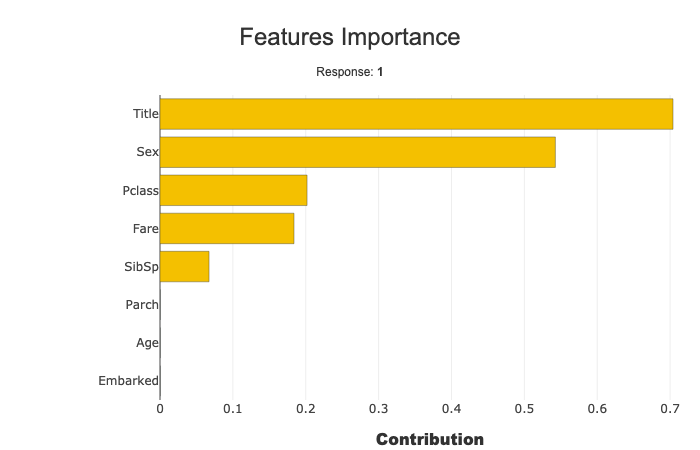

In [12]:
xpl.plot.features_importance()

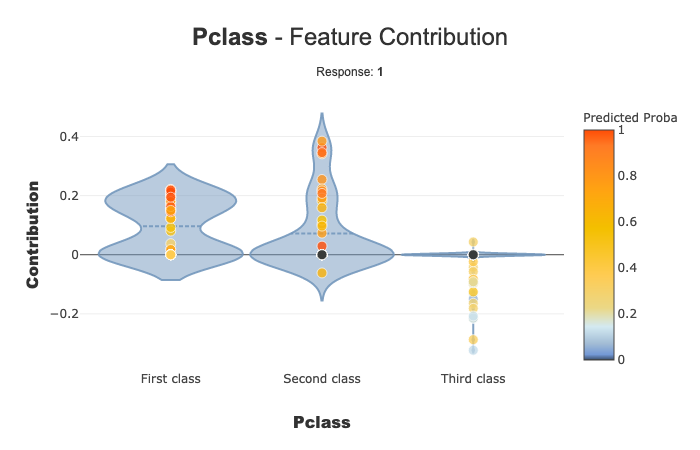

In [13]:
xpl.plot.contribution_plot(col='Pclass')

## WebApp

In [ ]:
app = xpl.run_app(title_story='ACV backend')

In [ ]:
app.kill()